# Exercise 1 - MCMC from scratch - HOMEWORK

In this exercise you will do two things. First, implement a simple Metropolis Hastings algorithm for a single parameter model. Second, use that to investigate the effect of altering the proposal distribution properties on performance.

The Model and Data: Generate 100 randomly chosen points from N(mu=-3,sigma=1). This is your data. Your goal is to use this data to infer the mean value of the generating distribution. For simplicity, the model you will be trying to fit is model = N(x,1).

In order to implement this parameter estimation, you will need to specify 1) A (log) likelihood function, 2) a prior distribution, 3) an acceptance function that decides whether to accept or reject a new parameter set, and 4) a metropolis hastings sampler. Write a separate function for each of these. For the proposal distribution, use

$$ Proposal \sim N(0,s)$$

For the first pass, use $s=1$, but we'll take a look at its effect later. For the prior, specify the uniform distribution

$$ Prior(x) = U(a,b)$$

where $a=-10, b=10$. Again, we'll play with this.

1) Implement a MCMC with 1 chain and 50,000 chain iterations. Discard the first 20,000 and then plot the posterior distribution using the rest. Initialize your MCMC run with a value of x=2, just so that you aern't cheating and initializing your parameter near the generating value.

2) Now vary the value of $s=0.1,1,10$. For each value, calculate the acceptance rate for the algorithm. By acceptance rate I mean the number of proposed parameter jumps that are kept. Also plot the value of x versus chain iteration. What do you notice? What happens when $s$ is too small or too big? 

3) Suppose you were too restrictive with your prior and accidentally used U(0,10) for your prior. What happens to your posterior? 

In [2]:
def prior(a,b,value):
    return uniform(a,b-a).pdf(value)

def loglik(value,s,data):
    likelihood = np.sum(np.log(norm(value, s).pdf(data)))
    return likelihood

def acceptance(value, new_value, alpha):
    rand = np.random.uniform()
    if rand < alpha:
        return True
    

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import uniform



s = 1 # standard deviation proposal
a = -10
b = 10 # limits of prior
iterations = 50000

# Data =  100 randomly chosen points 
#np.random.seed(17)
data = np.random.normal(-3, 1, 100)
#prior = np.random.uniform(a,b,100)



naccept = 0

# initalize random starting value
theta = 2
vals = []
posterior = []


# # MCMC
for i in range(iterations):

    
    # choose new proposal value according to proposal distribution
    proposal = np.random.normal(0,s,1)
    #posterior.append(proposal)
    
    # Compare previous value to new value 

    # Compute likelihood by multiplying probabilities of each data point
    likelihood_current = loglik(theta, s, data)
    likelihood_proposal = loglik(proposal, s, data)

        
    # Compute prior probability of current and proposed value        
    prior_current = prior(a,b,theta)
    prior_proposal = prior(a,b,proposal)
    
    
        
    p_current = likelihood_current * prior_current
    p_proposal = likelihood_proposal * prior_proposal
        

    # Accept proposal?
    alpha = p_proposal / p_current
        
    if acceptance(theta, proposal, alpha) == True:
        naccept +=1
        theta = proposal
    
    
    
    if i>= 20000:
        vals.append(theta)
        
print(theta)
print(naccept/iterations)

[0.6082093]
0.72842


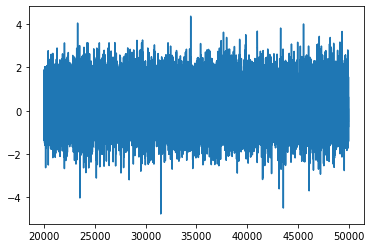

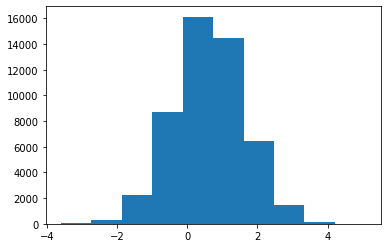

In [17]:
x = np.arange(20000, 50000)
plt.plot(x,vals)
plt.show()

posterior = np.random.normal(theta, 1, iterations)
plt.hist(posterior)
plt.show()

In [8]:
s = 0.1 # standard deviation proposal
a = -10
b = 10 # limits of prior
iterations = 50000

# Data =  100 randomly chosen points 
#np.random.seed(17)
data = np.random.normal(-3, 1, 100)
#prior = np.random.uniform(a,b,100)



naccept = 0

# initalize random starting value
theta = 2
vals = []
posterior = []


# # MCMC
for i in range(iterations):

    
    # choose new proposal value according to proposal distribution
    proposal = np.random.normal(0,s,1)
    #posterior.append(proposal)
    
    # Compare previous value to new value 

    # Compute likelihood by multiplying probabilities of each data point
    likelihood_current = loglik(theta, s, data)
    likelihood_proposal = loglik(proposal, s, data)

        
    # Compute prior probability of current and proposed value        
    prior_current = prior(a,b,theta)
    prior_proposal = prior(a,b,proposal)
    
    
        
    p_current = likelihood_current * prior_current
    p_proposal = likelihood_proposal * prior_proposal
        

    # Accept proposal?
    alpha = p_proposal / p_current
        
    if acceptance(theta, proposal, alpha) == True:
        naccept +=1
        theta = proposal
    
    
    
    if i>= 20000:
        vals.append(theta)
        
print(theta)
print(naccept/iterations)

<ipython-input-2-c249d5d15cba>:5: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(np.log(norm(value, s).pdf(data)))
<ipython-input-8-cf12b64394f6>:47: RuntimeWarning: invalid value encountered in true_divide
  alpha = p_proposal / p_current


2
0.0


There is an error when decreasing the standard deviation

In [18]:
s = 10 # standard deviation proposal
a = -10
b = 10 # limits of prior
iterations = 50000

# Data =  100 randomly chosen points 
#np.random.seed(17)
data = np.random.normal(-3, 1, 100)
#prior = np.random.uniform(a,b,100)



naccept = 0

# initalize random starting value
theta = 2
vals = []
posterior = []


# # MCMC
for i in range(iterations):

    
    # choose new proposal value according to proposal distribution
    proposal = np.random.normal(0,s,1)
    #posterior.append(proposal)
    
    # Compare previous value to new value 

    # Compute likelihood by multiplying probabilities of each data point
    likelihood_current = loglik(theta, s, data)
    likelihood_proposal = loglik(proposal, s, data)

        
    # Compute prior probability of current and proposed value        
    prior_current = prior(a,b,theta)
    prior_proposal = prior(a,b,proposal)
    
    
        
    p_current = likelihood_current * prior_current
    p_proposal = likelihood_proposal * prior_proposal
        

    # Accept proposal?
    alpha = p_proposal / p_current
        
    if acceptance(theta, proposal, alpha) == True:
        naccept +=1
        theta = proposal
    
    
    
    if i>= 20000:
        vals.append(theta)
        
print(theta)
print(naccept/iterations)

[5.99943391]
0.66074


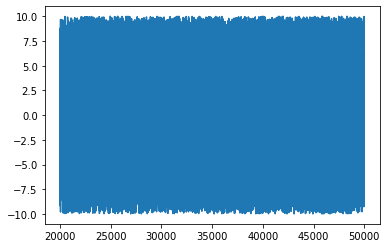

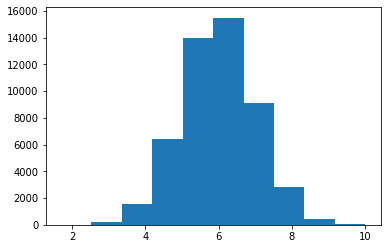

In [19]:
x = np.arange(20000, 50000)
plt.plot(x,vals)
plt.show()

posterior = np.random.normal(theta, 1, iterations)
plt.hist(posterior)
plt.show()

# Exercise 2 - Here we're going to look at a model of the distributional dynamics of sunspots. - IN CLASS

The file SN_y_tot_V2p0.txt (taken from http://www.sidc.be/silso/datafiles) contains the number of recorded sun spots each year from the 1700s to present. First plot both a plot of yearly sunstpots as a function of year and a histogram of the distribution of yearly sunspots. This distribution resembles an expoential distribution, or possibly a gamma distribution, which is a generilzation of the exponential. So lets use pymc to fit a gamma distribution to this data.

To specify a model, you need to specify the model distribution as well as priors for its parameters. Here, the model will be $Sunspot Count \sim \Gamma(a,b)$. For the gamma distribution, $a$ and $b$ must be positive. Read about what the gamma distribution is and come up with reasonable priors for each. These should be weakly informative priors. Don't just center them on what you think the right value is.

For this model, use pymc to build an approximation of the posterior distribution for (a,b). Use arviz to plot the posterior distributions for both as well as to plot a posterior predictive. I've left code below for performing such plotting.

For plotting posteriors

az.plot_trace(trace);

For plotting posterior predictive.

ppc = pm.sample_ppc(trace, samples=500, model=model)

print("ppc shape: " + str(np.asarray(ppc['g']).shape))

for i in ppc['g']:

    sns.kdeplot(i, color='r', alpha=0.1)
    
sns.kdeplot(spot_num,color='b')


(321, 4)
        0     1    2  3
0  1700.5   8.3 -1.0 -1
1  1701.5  18.3 -1.0 -1
2  1702.5  26.7 -1.0 -1
3  1703.5  38.3 -1.0 -1
4  1704.5  60.0 -1.0 -1


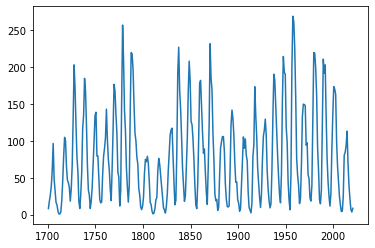

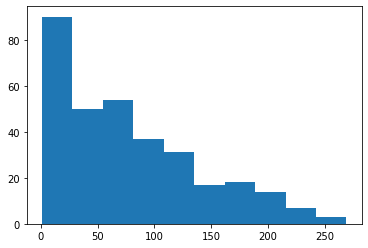

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_df = pd.read_table('SN_y_tot_V2p0.txt', sep='\s+', header = None)
print(data_df.shape)
data_df.head()
print(data_df.head())
spot_num = data_df.iloc[:,[1]].to_numpy().flatten()

spot_num[spot_num <= 0] = 1
year = data_df.iloc[:,[0]].to_numpy().flatten()

# plot number of sunspots as a function of year
plt.plot(year,spot_num)
plt.show()

# plot histogram of distribution of yearly sunspots
plt.hist(spot_num)
plt.show()


In [5]:
# # fit a gamma distribution using pymc
import pymc3 as pm
from theano import tensor as tt

def stick_breaking(beta):
    portion_remaining = tt.concatenate([[1], tt.extra_ops.cumprod(1 - beta)[:-1]])

    return beta * portion_remaining



K = 50
N = data_df.shape[0]

with pm.Model() as model:
    alpha = pm.Gamma("alpha", 1.0, 1.0)
    beta = pm.Beta("beta", 1, alpha, shape=K)
    w = pm.Deterministic("w", stick_breaking(beta))
    
    # Gamma is conjugate prior to Poisson
    lambda_ = pm.Gamma("lambda_", 300.0, 2.0, shape=K)
    obs = pm.Mixture("obs", w, pm.Poisson.dist(lambda_), observed=data_df[0])
    
with model:
    trace = pm.sample(500, tune=1000, chains = 4)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lambda_, beta, alpha]


ValueError: Not enough samples to build a trace.

In [ ]:
pm.traceplot(trace, var_names=["alpha"]);

c:\users\mayna\appdata\local\programs\python\python39\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
c:\users\mayna\appdata\local\programs\python\python39\lib\site-packages\pymc3\sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using advi...


Interrupted at 92 [0%]: Average Loss = 2.3275e+05


In [11]:
# plotting posteriors
import arviz as az
az.plot_trace(trace);

# plotting posterior predictive.

ppc = pm.sample_ppc(trace, samples=500, model=model)

print("ppc shape: " + str(np.asarray(ppc['g']).shape))

for i in ppc['g']:
    sns.kdeplot(i, color='r', alpha=0.1)
    sns.kdeplot(spot_num,color='b')

NameError: name 'trace' is not defined

********************
## sunspot explanation
I tried to run the model but it would not converge/complete in a decent amount of time... so the other parts were also not completed but the code to complete/attempt those parts is there.

# Exercise 3 - Covid19 - IN CLASS

On Nov. 18, 2020, Pfize and Bionthech released their initial efficacy data on their COVID19 vaccine (https://www.pfizer.com/news/press-release/press-release-detail/pfizer-and-biontech-conclude-phase-3-study-covid-19-vaccine). In that data, they note that out of 170 observed infections, 162 were in the placebo group while 8 were in the vaccinated group. Moderna released similar preliminary data indicating that of 95 total infections, 5 had occured in the vaccine group and 90 in the placebo group. AstraZeneca released data for two trial regimes. In one, 34 infections occured in the placebo group with 3 in the vaccine group and in the other, 26 occured in the vaccine group with 68 in the placebo group.

Use pymc3 to estimate the effectiveness. To do so, assume that the data for each trial can be modeled as a bernoulli process with a base parameter 

$$ p \sim Prob(Placebo | Infected) $$

In this formulation, p=0.9 would indicate that the probability that you were in the vaccine group given you were infected is 10% (90% chance you were in the placebo group), which would be considered effective. 

For your data, set up a data structure for each trial where an entryo of 0 indicates a vaccinated infection and 1 indicates a placebo infection. So for Pfizer, you will have a numpy array comprised of 170 entries consisting of 162 '1' entries and 8 '0' entries.

Since $p$ is a probability, what is a reasonable prior? Your choice, but justify why you are using what you are using.

1) Find the posterior distributions for $p$ for each of the four vaccine trials. Use 50k MCMC samples with 10k tuning samples. Plot the posteriors for all four vaccines on a single figure.

2) When the AstraZeneca data came out there was significant press about one dosing regime being more effective than the other. Lets take a look at this. (NOTE: What we are doing here is very limited and uses only the data above.) To do so, you can simultaneously fit separate models to the two dosing regime data sets while keeping track of the difference between the $p$ values for the two regimes. There is a snippet of code below for how to do this. Plot the posterior distribution of this difference. Also, determine the percentage of posterior samples that are >0 (or <0 depending on what you define as regime 1 and 2). This one type of measure of confidence that one regime is more or less effective than the other. This is often called a Bayesian p-value.

with pm.Model() as model_az:
    
    # Specify prior for regime 1.
    # Specify prior for regime 2.
    
    # Specify model for regime 1.
    # Specify model for regime 2.
    
    # The next line defines an auxillary variable, which is the difference between the two parameters.
    # By constructing this, you will be able to plot the posterior distribution of the difference between
    # these two.
    pm.Deterministic('difference', p_regimen1-p_regimen2)
    
    # Run the sampler
    
    # You can then use a line of code like below to extract the traces for this difference.
    trace.get_values('difference')

In [ ]:
n_Pfizer_total = 170
n_Pfizer_vaccine = 8
n_Pfizer_placebo = n_Pfizer_total - n_Pfizer_vaccine
Pfizer_outcomes = np.concatenate([np.zeros(n_Pfizer_vaccine), np.ones(n_Pfizer_placebo)])

n_Moderna_total = 95
n_Moderna_vaccine = 5
n_Moderna_placebo = n_Moderna_total - n_Moderna_vaccine
Moderna_outcomes = np.concatenate([np.zeros(n_Moderna_vaccine), np.ones(n_Moderna_placebo)])

n_AstraZeneca_1_total = 37
n_AstraZeneca_1_vaccine = 3
n_AstraZeneca_1_placebo = n_AstraZeneca_1_total - n_AstraZeneca_1_vaccine
AstraZeneca_1_outcomes = np.concatenate([np.zeros(n_AstraZeneca_1_vaccine), np.ones(n_AstraZeneca_1_placebo)])

n_AstraZeneca_2_total = 94
n_AstraZeneca_2_vaccine = 26
n_AstraZeneca_2_placebo = n_AstraZeneca_2_total - n_AstraZeneca_2_vaccine
AstraZeneca_2_outcomes = np.concatenate([np.zeros(n_AstraZeneca_2_vaccine), np.ones(n_AstraZeneca_2_placebo)])

************** 
Not going to run any of these codes because they take too long and are probably not completely right, but this is what I think goes into doing this problem.
**************

In [ ]:
# Find the posterior distributions for  𝑝  for each of the four vaccine trials. 
# Use 50k MCMC samples with 10k tuning samples. Plot the posteriors for all four vaccines on a single figure.

prior_pfizer = pm.Beta("beta", 1+n_pfizer_placebo, 1+n_pfizer_total)
prior_moderna = pm.Beta("beta", 1+n_moderna_placebo, 1+n_moderna_total)


##### Specify model for Pfizer

with pm.Model() as model:  # specify the model
    obs = pm.Mixture("obs", pm.Binomial(prior_pfizer), observed=Pfizer_outcomes)
    
with model:
    trace = pm.sample(50000, tune=10000, chains = 4) # run the model

##### Specify model for Moderna

with pm.Model() as model:  # specify the model
    obs = pm.Mixture("obs", pm.Binomial(prior_moderna), observed=Moderna_outcomes)
    
with model:
    trace = pm.sample(50000, tune=10000, chains = 4) # run the model

       
 

In [ ]:

##### Specify prior for regime 1. #####
# The prior is a beta because it is a probability between 0 and 1
prior1 = pm.Beta("beta", 1+n_AstraZeneca_1_placebo, 1+n_AstraZeneca_1_total)

##### Specify prior for regime 2. #####
prior2 = pm.Beta("beta", 1+n_AstraZeneca_2_placebo, 1+n_AstraZeneca_2_total)



##### Specify model for regime 1. #####

with pm.Model() as model:  # specify the model
    obs = pm.Mixture("obs", pm.Poisson.dist(lambda_), observed=AstraZeneca_1_outcomes)
    
with model:
    trace = pm.sample(50000, tune=10000, chains = 4) # run the model

p_regimen1 = trace['beta'] # posterior regimen1    
    
    
##### Specify model for regime 2. #####

with pm.Model() as model: # specify the model
    obs = pm.Mixture("obs", pm.Poisson.dist(lambda_), observed=AstraZeneca_1_outcomes)
    
with model:
    trace = pm.sample(50000, tune=10000, chains = 4) # run the model
    
p_regimen2 = trace['beta'] # posterior regimen2 





# The next line defines an auxillary variable, which is the difference between the two parameters.
# By constructing this, you will be able to plot the posterior distribution of the difference between
# these two.
pm.Deterministic('difference', p_regimen1-p_regimen2)

# Run the sampler

# You can then use a line of code like below to extract the traces for this difference.
trace.get_values('difference')




# Exercise 4 Polynomial Regression - Homework

Here we're going to use pymc to perform polynomial regression and use it as a testbed for exploring over-parameterized models. Generate 100 data points out of the model

$$ y \sim 2 + x + 0.5 x^2 + N(0,1) $$

where for the hundred points random values of $x \in [-3,3]$ are chosen.

Task 1: Use pymc3 to fit a quadratic polynomial to this data. Be sure to use uninformative priors.

Task 2: Fit a fourth degree polynomial to this data. What do you notice about the posteriors for the cubic and quartic coefficients?

Task 3: Fit a tenth degree polynomial. If you just try the naive approach, you'll notice that pymc grinds to a halt and says there are many "divergences" which is code for BAD (try it for good measure). Lets think about why that is. The interval for x is -3 ... 3. What is 3^10? Its an enormous number, which computers don't like. A 10th degree polynomial is very poorly conditioned for this reason. A way around this is to reparameterize the model according to

$$b_{n} x^n = (3^{n} b_{n}) \frac{x^n}{3^n} = \tilde{b_n} \frac{x^n}{3^n} . $$

With this, you no longer have the issue and the model will run fine. What do you notice about the higher order (unneeded) coefficients in this case? Note that this is effectively "feature normalization", which is standard in ML. If you think of each monomial as a feature, you are normalizing each to the interval $\pm 1$.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az

N = np.random.normal(0, 1, 100)
x = np.random.uniform(-3,3,100)
y = 2 + x + 0.5 * x**2 + N

# Use pymc3 to fit a quadratic polynomial to this data
with pm.Model() as model:
    a = pm.Normal('a', mu=0, sd=1)
    b = pm.Normal('b', mu=0, sd=1)
    c = pm.Normal('c', mu=0, sd=1)

    # define the model
    y_pred = pm.Normal('ypred', mu = a + b*x + c*x**2, sd = 1, observed = y)
    
    trace = pm.sample(2000,tune=1000,chains=4)


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
c:\users\mayna\appdata\local\programs\python\python39\lib\site-packages\pymc3\sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
c:\users\mayna\appdata\local\programs\python\python39\lib\site-packages\theano\tensor\elemwise.py:826:

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 216 seconds.
The acceptance probability does not match the target. It is 0.8790488774478372, but should be close to 0.8. Try to increase the number of tuning steps.


c:\users\mayna\appdata\local\programs\python\python39\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'a'}>],
       [<AxesSubplot:title={'center':'b'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'c'}>,
        <AxesSubplot:title={'center':'c'}>]], dtype=object)

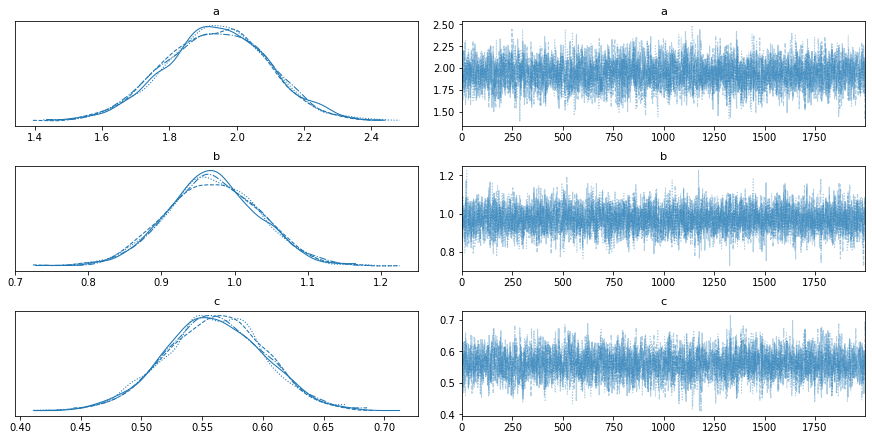

In [13]:
# plot posterior of each parameter as well as chain progression vs iteration
az.plot_trace(trace, var_names = ['a','b','c'])

In [15]:
N = np.random.normal(0, 1, 100)
x = np.random.uniform(-3,3,100)
y = 2 + x + 0.5 * x**2 + N

# Use pymc3 to fit a 4th degree polynomial to this data
with pm.Model() as model:
    a = pm.Normal('a', mu=0, sd=1)
    b = pm.Normal('b', mu=0, sd=1)
    c = pm.Normal('c', mu=0, sd=1)
    d = pm.Normal('d', mu=0, sd=1)
    e = pm.Normal('e', mu=0, sd=1)

    # define the model
    y_pred = pm.Normal('ypred', mu = a + b*x + c*x**2 + d*x**3 + e*x**4, sd = 1, observed = y)
    
    trace = pm.sample(2000,tune=1000,chains=4)

c:\users\mayna\appdata\local\programs\python\python39\lib\site-packages\pymc3\sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
c:\users\mayna\appdata\local\programs\python\python39\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
c:\users\mayna\appdata\local\programs\python\python39\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
c:\users\mayna\appdata\local\programs\python\python39\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = u

ValueError: Not enough samples to build a trace.

In [ ]:
az.plot_trace(trace, var_names = ['a','b','c','d','e'])

In [ ]:
N = np.random.normal(0, 1, 100)
x = np.random.uniform(-3,3,100)
y = 2 + x + 0.5 * x**2 + N

# Use pymc3 to fit a 4th degree polynomial to this data
with pm.Model() as model:
    bn = pm.Normal('bn', mu=0, sd=1)
  

    # define the model
    y_pred = pm.Normal('ypred', mu = bn*(x**10)/(3**10), sd = 1, observed = y)
    
    trace = pm.sample(2000,tune=1000,chains=4)

In [ ]:
az.plot_trace(trace, var_names = ['bn'])

*****************
The code takes too long to run so I did not run it.... sorry....